In [1]:
%matplotlib inline

#import mpld3
#mpld3.enable_notebook()

#%pylab inline
#pylab.rcParams['figure.figsize'] = (12, 6)

#import mpld3
#mpld3.enable_notebook()

#import matplotlib
import numpy as np
#import sympy
#from sympy import *
from control import matlab
import control
import scipy
import matplotlib.pyplot as plt



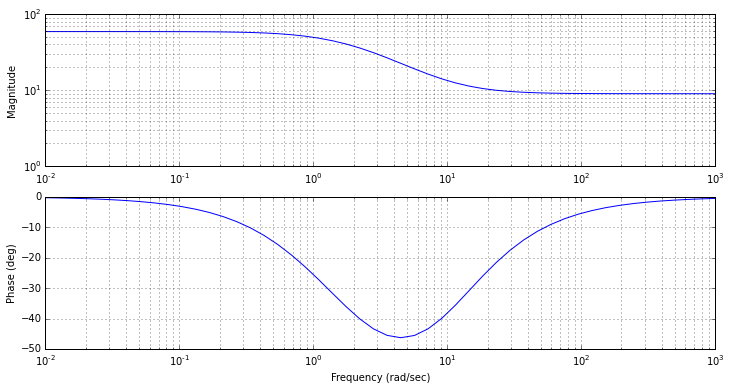

In [2]:
sys = control.ss("1. -2; 3. -4", "5.; 7", "6. 8", "9.")
plt.figure(figsize=(12,6))
mag, phase, omega = control.bode(sys)

## Step response for different values of gain $k$
Analyze the closed loop step response of the following system:
$$G(s)=\frac{k}{s(s+8)}$$

for the following values of $k\in \{7,16,80,400\}$

The closed loop transfer function:

$$G_{cl}(s)=\frac{G(s)}{1+G(s)H(s)}$$


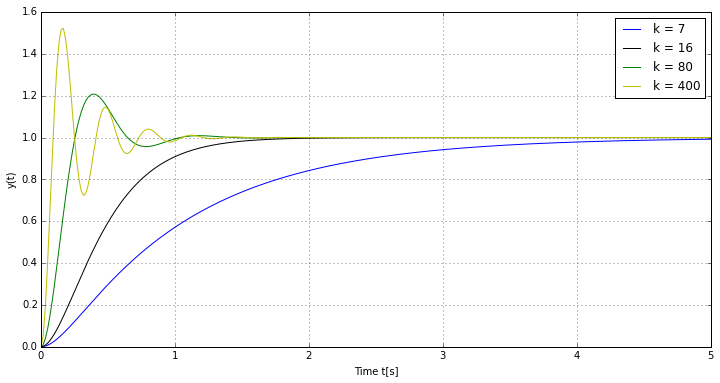

In [3]:
Y = []
T = []
S = []
K = [7,16,80,400]
t = np.linspace(0, 5, 300)
for k in K:
    H = control.matlab.tf(1,1)
    G = control.matlab.tf([0, 0, k],[1, 8, 0])
    G_cl = control.matlab.feedback(G,H)
    S.append(G_cl)
    y,t0 = control.matlab.step(G_cl,t)
    Y.append(y)
    T.append(t)
plt.figure(figsize=(12,6))
plt.hold(True)
st = ['b-', 'k-','g-','y-']
for i, k in enumerate(K):
    plt.plot(T[i],Y[i],st[i],label='k = %d'%(k))
plt.grid(True)
plt.xlabel('Time t[s]')
plt.ylabel('y(t)')
plt.legend()

c:\users\alex\anaconda3\lib\site-packages\control-0.6d-py3.4.egg\control\freqplot.py:124: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


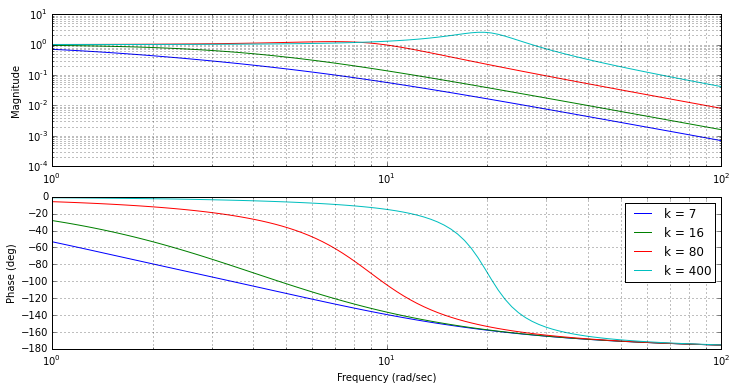

In [4]:
plt.figure(figsize=(12,6))
for i, k in enumerate(K):
    mag, phase, omega = control.bode(S[i], omega = np.logspace(0,2,100), label='k = %d'%(k))
plt.grid(True)
#plt.xlabel('Time t[s]')
#plt.ylabel('y(t)')
plt.legend()